# EDA (Exploratory Data Analysis)

# 1. Importanto bibliotecas e importando dados

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [90]:
# Lendo os DF's

df = pd.read_csv('DadosLimpos/DadosTratados.csv')
goleiros = pd.read_csv('DadosLimpos/Goleiros.csv')
defensores = pd.read_csv('DadosLimpos/Defensores.csv')
meiocampistas = pd.read_csv('DadosLimpos/MeioCampistas.csv')
atacantes = pd.read_csv('DadosLimpos/Atacantes.csv')

pd.set_option('display.max_columns', None)

In [91]:
df.columns

Index(['ID', 'Jogador', 'Nação', 'Pos', 'Equipe', 'Idade', 'Nascimento',
       'Jogos', 'Inícios', 'Minutos', '90s', 'Gols', 'Assist', 'G+A',
       'Gnormal', 'PC', 'PB', 'CartaoA', 'CartaoV', 'xG', 'xGnormal', 'xG+A',
       'xGnormal+xG+A', 'PrgCarregadas', 'PrgPasses', 'PrgPassesPrgRecebidos',
       'Gols90', 'Assis.90', 'G+A90', 'G-PB90', 'G+A-PB90', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'PassesTotaisConcluidos',
       'PassesTotaisTentados', '%ConclusãoDePasses', 'DistTotalPasses',
       'DistTotalProgressivos', 'PassesConcluidosCurto', 'PassesTentadosCurto',
       '%PassesConclusaoCurto', 'PassesConcluidosMedio', 'PassesTentadosMedio',
       '%PassesConclusaoMedio', 'PassesConcluidosLongo', 'PassesTentadosLongo',
       '%PassesConclusaoLongo', 'TotalChutes', 'ChutesAGol', '%ChutesNoGol',
       'TotalChutes/90', 'TotalAcertos/90', 'Gols/Chutes', 'Gols/ChuteaGol',
       'DistanciaChute', 'CobrancaFalta', 'BotesDefensivos', 'AssumiuPosse',
       'Confr

# 2. Estatísticas Gerais

* 2.1 - Nações mais presentes no Brasileirão 2023

In [92]:
# Gráfico da distribuição dos jogadores por nação

fig = px.histogram(df, df['Nação'])
for i in range(len(df['Nação'].value_counts())):
    fig.add_annotation(x=df['Nação'].value_counts().index[i], 
                       y=df['Nação'].value_counts()[i],
                       text=str(df['Nação'].value_counts()[i]),
                       showarrow=False,
                       font=dict(color='black', size=12))
fig.update_layout(bargap=0.1)
fig.show()

* Nações por posição

In [93]:
fig = px.sunburst(df, 
                   path=[df['Pos'], df['Nação']], 
                    
                 )
fig.update_layout(title_text='<b>Posição do jogador de acordo com sua nação <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=23, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
iplot(fig)

* 2.2 Idade dos jogadores

In [94]:
# Gráfico da dispersão da variável idade dos jogadores

fig = px.histogram(df, x='Idade')
fig.update_layout(bargap=0.1, 
                  title= 'HISTOGRAMA DAS IDADES'
                  )
fig.show()

In [95]:
# Distribuição da idade dos jogadores por posição

age_avg=df['Idade'].mean()
fig = px.violin(df, y="Idade", x="Pos", box=True,
                title='<b> Distribuição das Idades dos Jog. (med.Idade linha)<b>',
                width=600,height=400,template='simple_white')
fig.add_shape( 
    type="line", line_color="blue", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=age_avg, y1=age_avg, yref="y"
)
iplot(fig)

print('Idade média dos goleiros:',np.mean(goleiros['Idade']))
print('Idade média dos defensores:',np.mean(defensores['Idade']))
print('Idade média dos meiocampistas:',np.mean(meiocampistas['Idade']))
print('Idade média dos atacantes:',np.mean(atacantes['Idade']))
print('Idade média dos Jogaores:',np.mean(df['Idade']))

Idade média dos goleiros: 28.612244897959183
Idade média dos defensores: 26.172727272727272
Idade média dos meiocampistas: 24.714285714285715
Idade média dos atacantes: 24.784982935153582
Idade média dos Jogaores: 25.423435419440747


In [96]:
# Distribuição das idades por equipe

fig = px.box(df, y="Equipe", x="Idade",
            title='<b>Players Age distribution by club (avg. age dotted line)<b>',
            width=750,height=750,template='ggplot2')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
fig.update_layout( yaxis={'categoryorder':'total descending'})
iplot(fig)

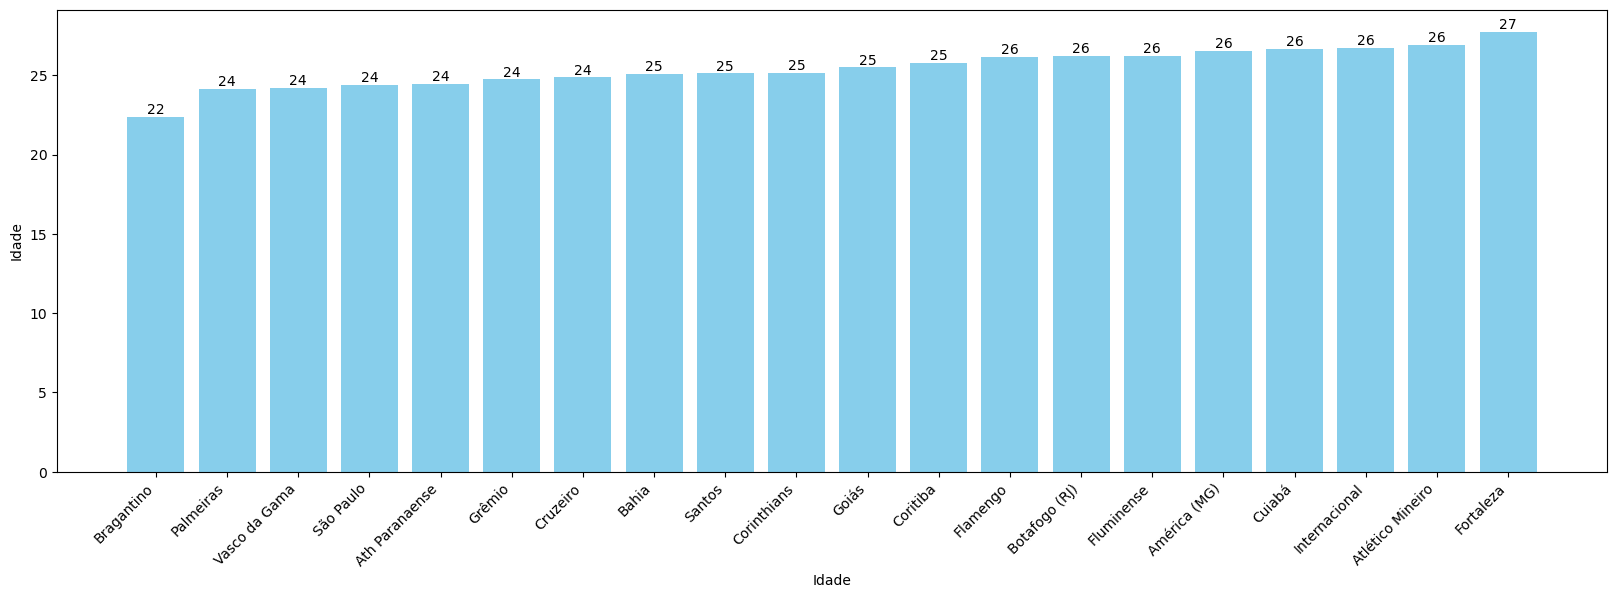

In [97]:
# Média de idade por equipe
media_idade_por_equipe = df.groupby('Equipe')['Idade'].mean().sort_values().reset_index()

plt.figure(figsize=(20,6))
barras = plt.bar(media_idade_por_equipe['Equipe'], media_idade_por_equipe['Idade'],color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Idade')
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,
             '%d' % int(altura),
             ha='center', va='bottom')
plt.xlabel('Idade')
plt.show()

* 2.3 Pênaltis


In [98]:
# Coletando informações dos pênaltis dos DataFrame

df[['Jogador','PC','PB', 'Gnormal','Gols']].sample(20)

penaltis_convertidos = df['PC'].sum()
penaltis_batidos = df['PB'].sum()
penaltis_perdidos = penaltis_batidos - penaltis_convertidos

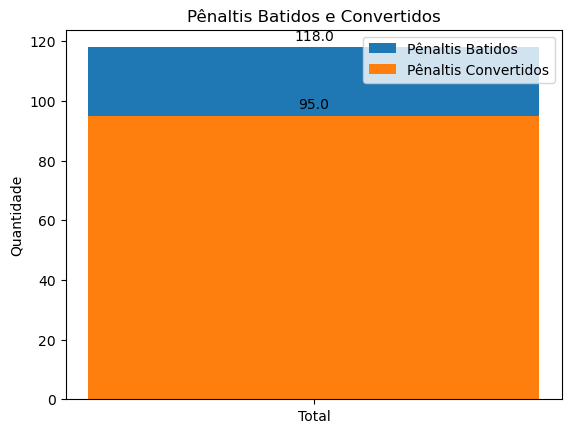

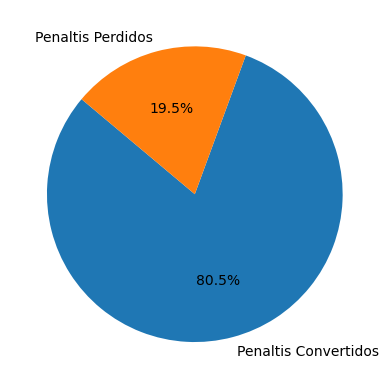

In [99]:
bar_width = 0.01
fig, ax = plt.subplots()
bar1 = ax.bar(0, penaltis_batidos, bar_width, label='Pênaltis Batidos')
bar2 = ax.bar(0, penaltis_convertidos, bar_width, label='Pênaltis Convertidos')

for rect in bar1:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adicionar rótulos, título etc.
ax.set_ylabel('Quantidade')
ax.set_title('Pênaltis Batidos e Convertidos')
ax.set_xticks([0])
ax.set_xticklabels(['Total'])
ax.legend()

plt.show()

#pie chart
sizes = [penaltis_convertidos,penaltis_perdidos]
labels = ['Penaltis Convertidos', 'Penaltis Perdidos']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [100]:
# Coletando dados de pênaltis por posição

penaltis_convertidos_goleiro = df[df['Pos'] == 'Goleiro']['PC'].sum()
penaltis_batido_goleiro = df[df['Pos'] == 'Goleiro']['PB'].sum()

penaltis_convertidos_atacante = df[df['Pos'] == 'Defensor']['PC'].sum()
penaltis_batido_atacante = df[df['Pos'] == 'Defensor']['PB'].sum()

penaltis_convertidos_meiocampista = df[df['Pos'] == 'Meio-Campista']['PC'].sum()
penaltis_batido_meiocampista = df[df['Pos'] == 'Meio-Campista']['PB'].sum()

penaltis_convertidos_atacante = df[df['Pos'] == 'Atacante']['PC'].sum()
penaltis_batido_atacante = df[df['Pos'] == 'Atacante']['PB'].sum()

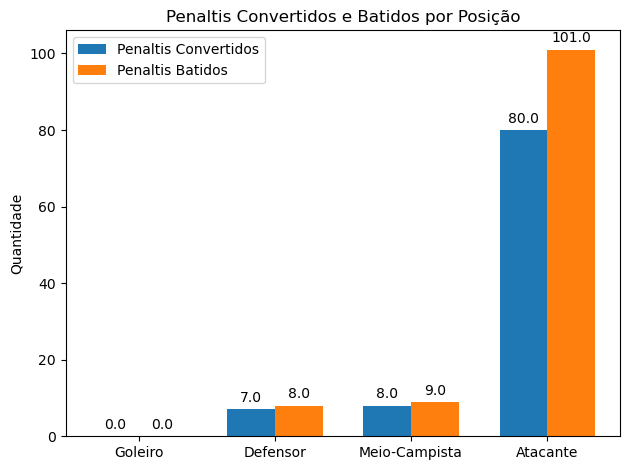

In [101]:
# Pênaltis batidos e convertidos por jogadores de diferentes posições

posicoes = ['Goleiro', 'Defensor', 'Meio-Campista', 'Atacante']
penaltis_convertidos = [
    df[df['Pos'] == 'Goleiro']['PC'].sum(),
    df[df['Pos'] == 'Defensor']['PC'].sum(),
    df[df['Pos'] == 'Meio-Campista']['PC'].sum(),
    df[df['Pos'] == 'Atacante']['PC'].sum()
]
penaltis_batidos = [
    df[df['Pos'] == 'Goleiro']['PB'].sum(),
    df[df['Pos'] == 'Defensor']['PB'].sum(),
    df[df['Pos'] == 'Meio-Campista']['PB'].sum(),
    df[df['Pos'] == 'Atacante']['PB'].sum()
]

# Criar o gráfico de barras
fig, ax = plt.subplots()
largura_barra = 0.35
indice = range(len(posicoes))

barra_convertidos = ax.bar(indice, penaltis_convertidos, largura_barra, label='Penaltis Convertidos')
barra_batidos = ax.bar([i + largura_barra for i in indice], penaltis_batidos, largura_barra, label='Penaltis Batidos')

# Adicionar rótulos, título etc.
ax.set_ylabel('Quantidade')
ax.set_title('Penaltis Convertidos e Batidos por Posição')
ax.set_xticks([i + largura_barra / 2 for i in indice])
ax.set_xticklabels(posicoes)
ax.legend()

# Adicionar valor nas barras
def adicionar_valor_barras(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

adicionar_valor_barras(barra_convertidos)
adicionar_valor_barras(barra_batidos)

plt.tight_layout()
plt.show()


* 2.4 Gols por time

In [102]:
gols_por_time = df.groupby('Equipe')['Gols'].sum().reset_index()
gols_por_time = gols_por_time.sort_values(by='Gols', ascending=False)

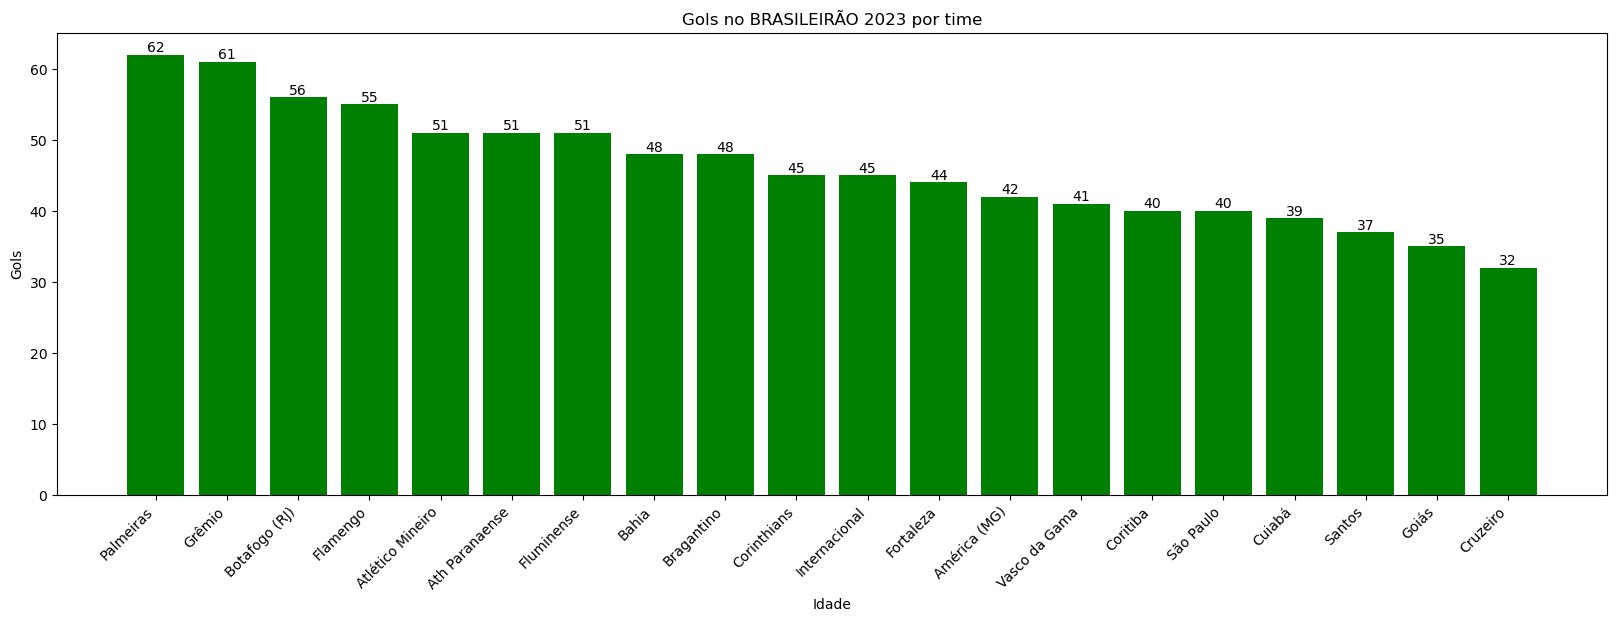

In [103]:
# Gols por time

plt.figure(figsize=(20,6))
barras = plt.bar(gols_por_time['Equipe'], gols_por_time['Gols'],color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gols')
plt.title('Gols no BRASILEIRÃO 2023 por time')
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,  
             '%d' % int(altura),
             ha='center', va='bottom')
plt.xlabel('Idade')
plt.show()

# 3. Estatísticas individuais por posição
* 3.1 Defensores

In [104]:
# Criando imagem elencando  jogadores por características diferentes.

top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Assumiu Posse','Botes Defensivos','Confrontos_1terço','Confrontos_2terço','Confrontos_3terço','Chutes Bloqueados','Desarme',
                    '%DesarmesCertos','PassesBloqueados','Cortes','Interceptacoes','Erros'
),
    )


dfdef = defensores.sort_values(by='AssumiuPosse', ascending=False).head(top)
fig.add_trace(go.Bar(x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['AssumiuPosse'],
             orientation='v'),
             row=1, col=1)
              
dfdef = defensores.sort_values(by='BotesDefensivos', ascending=False).head(top)
fig.add_trace(go.Bar(x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['BotesDefensivos'],
             orientation='v'),
             row=2, col=1)  

dfdef = defensores.sort_values(by='Confrontos_1ter', ascending=False).head(top)
fig.add_trace(go.Bar(x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['Confrontos_1ter'],
             orientation='v'),
             row=3, col=1)


dfdef = defensores.sort_values(by='Confrontos_2ter', ascending=False).head(top)
fig.add_trace(go.Bar(x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['Confrontos_2ter'],
             orientation='v'),
             row=4,col=1)

dfdef = defensores.sort_values(by='Confrontos_3ter', ascending=False).head(top)
fig.add_trace(go.Bar( x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['Confrontos_3ter'],
             orientation='v'),
             row=5, col=1)


dfdef = defensores.sort_values(by='ChutesBloqueados', ascending=False).head(top)
fig.add_trace(go.Bar( x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['ChutesBloqueados'],
             orientation='v'),
             row=1, col=2)

dfdef = defensores.sort_values(by='Desarme', ascending=False).head(top)
fig.add_trace(go.Bar( x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['Desarme'],
             orientation='v'),
             row=2, col=2)
  

dfdef = defensores.sort_values(by='%DesarmesCertos', ascending=False).head(top)
fig.add_trace(go.Bar(x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['%DesarmesCertos'],
             orientation='v'),
             row=3, col=2)


dfdef = defensores.sort_values(by='PassesBloqueados', ascending=False).head(top)
fig.add_trace(go.Bar( x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['PassesBloqueados'],
             orientation='v'),
             row=4,col=2)

dfdef = defensores.sort_values(by='Cortes', ascending=False).head(top)
fig.add_trace(go.Bar( x=dfdef["Jogador"]+ '<br>' + dfdef["Equipe"].apply(lambda x: f"({x})"), 
             y=dfdef['Cortes'],
             orientation='v'),
             row=5, col=2)

fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Estatísticas Defensivas - Brasileirão 2023<b>', 
                  titlefont={'size':30},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1300,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()
#fig.write_image(file='d.png',format='png')


* 3.2 Meio-Campistas Defensivos

In [105]:
top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing=0.05,
    vertical_spacing=0.075,
    subplot_titles=(
        'Assumiu Posse', 'Botes Defensivos', 'Confrontos_1terço', 'Confrontos_2terço', 'Confrontos_3terço',
        'Chutes Bloqueados', 'Desarme', '%DesarmesCertos', 'PassesBloqueados', 'Cortes', 'Interceptacoes', 'Erros'
    ),
)
stats_to_plot = [
    'AssumiuPosse', 'BotesDefensivos', 'Confrontos_1ter', 'Confrontos_2ter', 'Confrontos_3ter', 'ChutesBloqueados',
    'Desarme', '%DesarmesCertos', 'PassesBloqueados', 'Cortes'
]
for idx, stat in enumerate(stats_to_plot, start=1):
    row_idx = (idx - 1) // 2 + 1
    col_idx = (idx - 1) % 2 + 1

    dfmeio = meiocampistas.sort_values(by=stat, ascending=False).head(top)
    fig.add_trace(go.Bar(x=dfmeio["Jogador"] + '<br>' + dfmeio["Equipe"].apply(lambda x: f"({x})"),
                         y=dfmeio[stat],
                         orientation='v'),
                  row=row_idx, col=col_idx)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(
    title_text='<b>Estatísticas Defensivas Meiocampistas - Brasileirão 2023<b>',
    titlefont={'size': 30},
    title_x=0.5,
    showlegend=False,
    autosize=False,
    width=1300,
    height=1300,
    template='ggplot2',
    paper_bgcolor='lightgray'
)

fig.show()
#fig.write_image("Estatísticas Defensivas Meiocampistas.png")


* 3.3 Meio-Campistas Ofensivos

In [106]:
top = 5

fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing=0.05,
    vertical_spacing=0.075,
    subplot_titles=(
        'Gols', 'Assistências', 'Gols + Assists', 'xGols', 'xGols + Assists',
        'Carregadas Progressivas', 'Passes Progressivos', '%ConclusãoDePasses', 'Chutes a Gol', '%ChutesNoGol'
    ),
)

stats_to_plot = [
    'Gols' ,'Assist', 'G+A', 'xG', 'xG+A', 'PrgCarregadas', 'PrgPasses' ,'%ConclusãoDePasses' ,'ChutesAGol' ,'%ChutesNoGol'
]

for idx, stat in enumerate(stats_to_plot, start=1):
    row_idx = (idx - 1) // 2 + 1
    col_idx = (idx - 1) % 2 + 1

    dfmeio = meiocampistas.sort_values(by=stat, ascending=False).head(top)
    fig.add_trace(go.Bar(x=dfmeio["Jogador"] + '<br>' + dfmeio["Equipe"].apply(lambda x: f"({x})"),
                         y=dfmeio[stat],
                         orientation='v'),
                  row=row_idx, col=col_idx)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(
    title_text='<b>Estatísticas Ofensivas Meiocampistas - Brasileirão 2023<b>',
    titlefont={'size': 30},
    title_x=0.5,
    showlegend=False,
    autosize=False,
    width=1300,
    height=1300,
    template='ggplot2',
    paper_bgcolor='lightgray'
)

fig.show()
#fig.write_image("Estatísticas Ofensivas Meiocampistas.png")

* 3.4 Atacantes

In [107]:
top = 5

fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing=0.05,
    vertical_spacing=0.075,
    subplot_titles=(
        'Gols', 'Assistências', 'Gols + Assists', 'xGols', 'xGols + Assists',
        'Carregadas Progressivas', 'Passes Progressivos', '%ConclusãoDePasses', 'Chutes a Gol', '%ChutesNoGol'
    ),
)
stats_to_plot = [
    'Gols' ,'Assist', 'G+A', 'xG', 'xG+A', 'PrgCarregadas', 'PrgPasses' ,'%ConclusãoDePasses' ,'ChutesAGol' ,'%ChutesNoGol'
]
for idx, stat in enumerate(stats_to_plot, start=1):
    row_idx = (idx - 1) // 2 + 1
    col_idx = (idx - 1) % 2 + 1

    dfataq= atacantes.sort_values(by=stat, ascending=False).head(top)
    fig.add_trace(go.Bar(x=dfataq["Jogador"] + '<br>' + dfataq["Equipe"].apply(lambda x: f"({x})"),
                         y=dfataq[stat],
                         orientation='v'),
                  row=row_idx, col=col_idx)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(
    title_text='<b>Estatísticas Atacantes - Brasileirão 2023<b>',
    titlefont={'size': 30},
    title_x=0.5,
    showlegend=False,
    autosize=False,
    width=1300,
    height=1300,
    template='ggplot2',
    paper_bgcolor='lightgray'
)

fig.show()
#fig.write_image("Estatísticas  Ofensivas Atacantes.png")

# 5. Estabelecendo notas para os 4 tipos de jogadores
- Defensores
- Meio-Campistas defensivos
- Meio-Campistas ofensivos
- Atacantes

Vamos distribuir os pesos para cada uma das estatísticas:

1 - Gols (Goals): Esta é uma das estatísticas mais importantes, já que representa a capacidade do jogador de marcar gols. Peso: 0.25

2 - Assistências (Assists): As assistências são cruciais, pois mostram a habilidade do jogador em criar oportunidades para os companheiros marcarem gols. Peso: 0.2

3 - Gols + Assistências: Uma combinação de gols e assistências pode fornecer uma visão mais holística da contribuição do jogador para o ataque. Peso: 0.15

4 - xGols (Expected Goals): O xGols mostra a qualidade das oportunidades de gol criadas pelo jogador. Peso: 0.1

5 - xGols + Assistências: Assim como a estatística anterior, esta métrica oferece uma perspectiva sobre a qualidade das oportunidades de gol criadas e assistências. Peso: 0.1

6 - Carregadas Progressivas (Progressive Carries): Indica a habilidade do jogador de levar a bola para a frente, criando oportunidades de ataque. Peso: 0.05

7 - Passes Progressivos (Progressive Passes): Mostra a capacidade do jogador de fazer passes que avançam a posição da equipe. Peso: 0.05

8 - %Conclusão de Passes (Pass Completion Percentage): Reflete a precisão dos passes do jogador. Peso: 0.05

9 - Chutes a Gol (Shots on Target): Mostra a precisão do jogador ao chutar a gol. Peso: 0.05

10 - % Chutes no Gol (Shot Accuracy): Indica a precisão dos chutes do jogador em relação ao gol. Peso: 0.05

In [108]:
#Gols' ,'Assist', 'G+A', 'xG', 'xG+A', 'PrgCarregadas', 'PrgPasses' ,'%ConclusãoDePasses' ,'ChutesAGol' ,'%ChutesNoGol
pesos_ofensivos = {
    'Gols': 0.25,
    'Assist': 0.2,
    'G+A': 0.15,
    'xG': 0.1,
    'xG+A': 0.1,
    'PrgCarregadas': 0.05,
    'PrgPasses': 0.05,
    '%ConclusãoDePasses': 0.05,
    'ChutesAGol': 0.05,
    '%ChutesNoGol': 0.05
}

pesos_defensivos = {
    'AssumiuPosse': 0.15,
    'BotesDefensivos': 0.2,
    'Confrontos_1ter': 0.067,  # Dividido igualmente entre os três terços do campo
    'Confrontos_2ter': 0.067,
    'Confrontos_3ter': 0.067,
    'ChutesBloqueados': 0.1,
    'Desarme': 0.15,
    '%DesarmesCertos': 0.1,
    'PassesBloqueados': 0.05,
    'Cortes': 0.05
}


* 5.1 Formando notas defensivas e ofensivas para os **ATACANTES**

In [109]:
numerical_columns = atacantes.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
scaler.fit(atacantes[numerical_columns])

scaled_data = scaler.transform(atacantes[numerical_columns])
atacantes[numerical_columns] = scaled_data

atacantes['Nota'] = (
    atacantes['Gols'] * pesos_ofensivos['Gols'] +
    atacantes['Assist'] * pesos_ofensivos['Assist'] +
    atacantes['G+A'] * pesos_ofensivos['G+A'] +
    atacantes['xG'] * pesos_ofensivos['xG'] +
    atacantes['xG+A'] * pesos_ofensivos['xG+A'] +
    atacantes['PrgCarregadas'] * pesos_ofensivos['PrgCarregadas'] +
    atacantes['PrgPasses'] * pesos_ofensivos['PrgPasses'] +
    atacantes['%ConclusãoDePasses'] * pesos_ofensivos['%ConclusãoDePasses'] +
    atacantes['ChutesAGol'] * pesos_ofensivos['ChutesAGol'] +
    atacantes['%ChutesNoGol'] * pesos_ofensivos['%ChutesNoGol']
)

atacantes['Nota_Defesa'] = (
    atacantes['AssumiuPosse'] * pesos_defensivos['AssumiuPosse'] +
    atacantes['BotesDefensivos'] * pesos_defensivos['BotesDefensivos'] +
    atacantes['Confrontos_1ter'] * pesos_defensivos['Confrontos_1ter'] + 
    atacantes['Confrontos_2ter'] * pesos_defensivos['Confrontos_2ter'] + 
    atacantes['Confrontos_3ter'] * pesos_defensivos['Confrontos_3ter'] +
    atacantes['ChutesBloqueados'] * pesos_defensivos['ChutesBloqueados'] +
    atacantes['Desarme'] * pesos_defensivos['Desarme'] +
    atacantes['%DesarmesCertos'] * pesos_defensivos['%DesarmesCertos'] +
    atacantes['PassesBloqueados'] * pesos_defensivos['PassesBloqueados'] +
    atacantes['Cortes'] * pesos_defensivos['Cortes'])

min_pontuacao = atacantes['Nota'].min()
max_pontuacao = atacantes['Nota'].max()
atacantes['Nota'] = 10 * (atacantes['Nota'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
atacantes['Nota'] = atacantes['Nota'].round(2)


min_pontuacao = atacantes['Nota_Defesa'].min()
max_pontuacao = atacantes['Nota_Defesa'].max()
atacantes['Nota_Defesa'] = 10 * (atacantes['Nota_Defesa'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
atacantes['Nota_Defesa'] = atacantes['Nota_Defesa'].round(2)
atacantes.head()

,ID,Jogador,Nação,Pos,Equipe,Idade,Nascimento,Jogos,Inícios,Minutos,90s,Gols,Assist,G+A,Gnormal,PC,PB,CartaoA,CartaoV,xG,xGnormal,xG+A,xGnormal+xG+A,PrgCarregadas,PrgPasses,PrgPassesPrgRecebidos,Gols90,Assis.90,G+A90,G-PB90,G+A-PB90,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PassesTotaisConcluidos,PassesTotaisTentados,%ConclusãoDePasses,DistTotalPasses,DistTotalProgressivos,PassesConcluidosCurto,PassesTentadosCurto,%PassesConclusaoCurto,PassesConcluidosMedio,PassesTentadosMedio,%PassesConclusaoMedio,PassesConcluidosLongo,PassesTentadosLongo,%PassesConclusaoLongo,TotalChutes,ChutesAGol,%ChutesNoGol,TotalChutes/90,TotalAcertos/90,Gols/Chutes,Gols/ChuteaGol,DistanciaChute,CobrancaFalta,BotesDefensivos,AssumiuPosse,Confrontos_1ter,Confrontos_2ter,Confrontos_3ter,Desarme,%DesarmesCertos,DesarmeErrado,ChutesBloqueados,PassesBloqueados,Cortes,Interceptacoes,Def,Erros,Nota,Nota_Defesa
0,0.000000,Luiz Adriano,BRA,Atacante,Internacional,0.863636,0.136364,0.777778,0.485714,0.444482,0.445783,0.15,0.090909,0.142857,0.15,0.0,0.0,0.076923,0.5,0.174497,0.174497,0.188406,0.214286,0.021127,0.115578,0.163333,0.111732,0.022581,0.087097,0.111732,0.087097,0.102857,0.036885,0.110656,0.102857,0.110656,0.152829,0.152778,0.822,0.109908,0.052509,0.145289,0.156716,0.871,0.101933,0.096210,0.879,0.038462,0.031373,0.750,0.190476,0.203704,0.458,0.036000,0.168565,0.26,0.27,0.226772,0.0,0.169014,0.166667,0.00000,0.162162,0.3750,0.066667,0.286,0.076923,0.181818,0.155556,0.209302,0.205882,0.352941,0.0,2.19,2.21
1,0.004000,Adson,BRA,Atacante,Corinthians,0.272727,0.727273,0.388889,0.257143,0.286288,0.286145,0.00,0.090909,0.035714,0.00,0.0,0.0,0.000000,0.0,0.026846,0.026846,0.144928,0.076923,0.345070,0.266332,0.226667,0.000000,0.035484,0.035484,0.000000,0.035484,0.022857,0.045082,0.061475,0.022857,0.061475,0.231447,0.234903,0.810,0.198026,0.148225,0.209989,0.222814,0.885,0.165202,0.179300,0.764,0.134615,0.125490,0.656,0.079365,0.055556,0.300,0.023333,0.072893,0.00,0.00,0.379528,0.0,0.464789,0.619048,0.68750,0.216216,0.1875,0.400000,0.571,0.138462,0.181818,0.311111,0.186047,0.401961,0.019608,0.0,1.46,5.46
2,0.005333,Adyson,BRA,Atacante,América (MG),0.045455,0.954545,0.194444,0.028571,0.081605,0.081325,0.00,0.000000,0.000000,0.00,0.0,0.0,0.076923,0.0,0.013423,0.013423,0.057971,0.032967,0.119718,0.085427,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.057377,0.086066,0.040000,0.086066,0.071271,0.084541,0.693,0.067291,0.079559,0.054484,0.059701,0.857,0.065026,0.074344,0.725,0.051282,0.078431,0.400,0.031746,0.018519,0.250,0.032667,0.084282,0.00,0.00,0.281890,0.0,0.112676,0.119048,0.09375,0.081081,0.1250,0.100000,0.500,0.046154,0.000000,0.022222,0.116279,0.127451,0.000000,0.0,0.74,1.73
3,0.008000,Carlos Alberto,BRA,Atacante,Botafogo (RJ),0.181818,0.818182,0.388889,0.028571,0.098662,0.099398,0.10,0.000000,0.071429,0.10,0.0,0.0,0.000000,0.0,0.073826,0.073826,0.028986,0.076923,0.070423,0.045226,0.096667,0.340782,0.000000,0.196774,0.340782,0.196774,0.200000,0.028689,0.172131,0.200000,0.172131,0.046289,0.045290,0.840,0.039605,0.026438,0.037457,0.038380,0.917,0.042179,0.042274,0.828,0.025641,0.019608,0.800,0.055556,0.055556,0.429,0.047333,0.207289,0.58,0.67,0.196850,0.0,0.042254,0.000000,0.03125,0.027027,0.0625,0.066667,0.400,0.046154,0.181818,0.066667,0.023256,0.039216,0.078431,0.0,1.33,1.16
4,0.009333,Yuri Alberto,BRA,Atacante,Corinthians,0.227273,0.772727,0.916667,0.914286,0.910033,0.909639,0.40,0.272727,0.392857,0.40,0.0,0.0,0.461538,0.0,0.671141,0.671141,0.391304,0.697802,0.288732,0.140704,0.680000,0.145251,0.032258,0.116129,0.145251,0.116129,0.188571,0.036885,0.172131,0.188571,0.172131,0.306392,0.350845,0.718,0.227970,0.098042,0.295119,0.348614,0.795,0.209139,0.230321,0.753,0.076923,0.082353,0.571,0.682540,0.518519,0.326,0.063111,0.211845,0.18,0.29,0.229921,0.0,0.323944,0.333333,0.18750,0.216216,0.5625,0.300000,0.409,0.200000,0.181818,0.466667,0.069767,0.254902,0.333333,0.0,4.72,4.05


* 5.2 Formando notas defensivas e ofensivas para os **MEIO-CAMPISTAS**

In [110]:
numerical_columns = meiocampistas.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
scaler.fit(meiocampistas[numerical_columns])

scaled_data = scaler.transform(meiocampistas[numerical_columns])
meiocampistas[numerical_columns] = scaled_data

meiocampistas['Nota'] = (
    meiocampistas['Gols'] * pesos_ofensivos['Gols'] +
    meiocampistas['Assist'] * pesos_ofensivos['Assist'] +
    meiocampistas['G+A'] * pesos_ofensivos['G+A'] +
    meiocampistas['xG'] * pesos_ofensivos['xG'] +
    meiocampistas['xG+A'] * pesos_ofensivos['xG+A'] +
    meiocampistas['PrgCarregadas'] * pesos_ofensivos['PrgCarregadas'] +
    meiocampistas['PrgPasses'] * pesos_ofensivos['PrgPasses'] +
    meiocampistas['%ConclusãoDePasses'] * pesos_ofensivos['%ConclusãoDePasses'] +
    meiocampistas['ChutesAGol'] * pesos_ofensivos['ChutesAGol'] +
    meiocampistas['%ChutesNoGol'] * pesos_ofensivos['%ChutesNoGol']
)

meiocampistas['Nota_Defesa'] = (
    meiocampistas['AssumiuPosse'] * pesos_defensivos['AssumiuPosse'] +
    meiocampistas['BotesDefensivos'] * pesos_defensivos['BotesDefensivos'] +
    meiocampistas['Confrontos_1ter'] * pesos_defensivos['Confrontos_1ter'] + 
    meiocampistas['Confrontos_2ter'] * pesos_defensivos['Confrontos_2ter'] + 
    meiocampistas['Confrontos_3ter'] * pesos_defensivos['Confrontos_3ter'] +
    meiocampistas['ChutesBloqueados'] * pesos_defensivos['ChutesBloqueados'] +
    meiocampistas['Desarme'] * pesos_defensivos['Desarme'] +
    meiocampistas['%DesarmesCertos'] * pesos_defensivos['%DesarmesCertos'] +
    meiocampistas['PassesBloqueados'] * pesos_defensivos['PassesBloqueados'] +
    meiocampistas['Cortes'] * pesos_defensivos['Cortes'])

min_pontuacao = meiocampistas['Nota'].min()
max_pontuacao = meiocampistas['Nota'].max()
meiocampistas['Nota'] = 10 * (meiocampistas['Nota'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
meiocampistas['Nota'] = meiocampistas['Nota'].round(2)


min_pontuacao = meiocampistas['Nota_Defesa'].min()
max_pontuacao = meiocampistas['Nota_Defesa'].max()
meiocampistas['Nota_Defesa'] = 10 * (meiocampistas['Nota_Defesa'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
meiocampistas['Nota_Defesa'] = meiocampistas['Nota_Defesa'].round(2)


5.3 Formando notas defensivas e ofensivas para os **DEFENSORES**

In [111]:
numerical_columns = defensores.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
scaler.fit(defensores[numerical_columns])

scaled_data = scaler.transform(defensores[numerical_columns])
defensores[numerical_columns] = scaled_data

defensores['Nota'] = (
    defensores['Gols'] * pesos_ofensivos['Gols'] +
    defensores['Assist'] * pesos_ofensivos['Assist'] +
    defensores['G+A'] * pesos_ofensivos['G+A'] +
    defensores['xG'] * pesos_ofensivos['xG'] +
    defensores['xG+A'] * pesos_ofensivos['xG+A'] +
    defensores['PrgCarregadas'] * pesos_ofensivos['PrgCarregadas'] +
    defensores['PrgPasses'] * pesos_ofensivos['PrgPasses'] +
    defensores['%ConclusãoDePasses'] * pesos_ofensivos['%ConclusãoDePasses'] +
    defensores['ChutesAGol'] * pesos_ofensivos['ChutesAGol'] +
    defensores['%ChutesNoGol'] * pesos_ofensivos['%ChutesNoGol']
)

defensores['Nota_Defesa'] = (
    defensores['AssumiuPosse'] * pesos_defensivos['AssumiuPosse'] +
    defensores['BotesDefensivos'] * pesos_defensivos['BotesDefensivos'] +
    defensores['Confrontos_1ter'] * pesos_defensivos['Confrontos_1ter'] + 
    defensores['Confrontos_2ter'] * pesos_defensivos['Confrontos_2ter'] + 
    defensores['Confrontos_3ter'] * pesos_defensivos['Confrontos_3ter'] +
    defensores['ChutesBloqueados'] * pesos_defensivos['ChutesBloqueados'] +
    defensores['Desarme'] * pesos_defensivos['Desarme'] +
    defensores['%DesarmesCertos'] * pesos_defensivos['%DesarmesCertos'] +
    defensores['PassesBloqueados'] * pesos_defensivos['PassesBloqueados'] +
    defensores['Cortes'] * pesos_defensivos['Cortes'])

min_pontuacao = defensores['Nota'].min()
max_pontuacao = defensores['Nota'].max()
defensores['Nota'] = 10 * (defensores['Nota'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
defensores['Nota'] = defensores['Nota'].round(2)


min_pontuacao = defensores['Nota_Defesa'].min()
max_pontuacao = defensores['Nota_Defesa'].max()
defensores['Nota_Defesa'] = 10 * (defensores['Nota_Defesa'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
defensores['Nota_Defesa'] = defensores['Nota_Defesa'].round(2)
defensores.head()

,ID,Jogador,Nação,Pos,Equipe,Idade,Nascimento,Jogos,Inícios,Minutos,90s,Gols,Assist,G+A,Gnormal,PC,PB,CartaoA,CartaoV,xG,xGnormal,xG+A,xGnormal+xG+A,PrgCarregadas,PrgPasses,PrgPassesPrgRecebidos,Gols90,Assis.90,G+A90,G-PB90,G+A-PB90,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PassesTotaisConcluidos,PassesTotaisTentados,%ConclusãoDePasses,DistTotalPasses,DistTotalProgressivos,PassesConcluidosCurto,PassesTentadosCurto,%PassesConclusaoCurto,PassesConcluidosMedio,PassesTentadosMedio,%PassesConclusaoMedio,PassesConcluidosLongo,PassesTentadosLongo,%PassesConclusaoLongo,TotalChutes,ChutesAGol,%ChutesNoGol,TotalChutes/90,TotalAcertos/90,Gols/Chutes,Gols/ChuteaGol,DistanciaChute,CobrancaFalta,BotesDefensivos,AssumiuPosse,Confrontos_1ter,Confrontos_2ter,Confrontos_3ter,Desarme,%DesarmesCertos,DesarmeErrado,ChutesBloqueados,PassesBloqueados,Cortes,Interceptacoes,Def,Erros,Nota,Nota_Defesa
0,0.000000,Adryelson,BRA,Defensor,Botafogo (RJ),0.347826,0.652174,0.944444,0.945946,0.912553,0.912329,0.25,0.2,0.250,0.25,0.0,0.0,0.352941,0.5,0.275,0.34375,0.057692,0.189189,0.017857,0.242424,0.010309,0.090909,0.039474,0.078947,0.090909,0.078947,0.076923,0.033333,0.102564,0.076923,0.102564,0.646009,0.672703,0.856,0.649035,0.610851,0.460177,0.484472,0.889,0.661217,0.689394,0.889,0.609053,0.579670,0.701,0.235294,0.238095,0.417,0.048000,0.075,0.16,0.2,0.280453,0.0,0.298246,0.277778,0.328571,0.285714,0.0625,0.229730,0.654,0.138462,0.833333,0.265306,0.772152,0.582822,1.000000,0.666667,3.38,4.67
1,0.013459,Alex,BRA,Defensor,Santos,0.304348,0.695652,0.138889,0.135135,0.138330,0.139726,0.00,0.0,0.000,0.00,0.0,0.0,0.058824,0.0,0.025,0.03125,0.076923,0.081081,0.026786,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.266667,0.282051,0.076923,0.282051,0.109569,0.107774,0.906,0.108598,0.079467,0.061947,0.064182,0.903,0.137148,0.132155,0.962,0.053498,0.057692,0.619,0.078431,0.095238,0.500,0.105333,0.200,0.00,0.0,0.322946,0.0,0.078947,0.097222,0.114286,0.000000,0.0625,0.027027,0.500,0.030769,0.055556,0.020408,0.088608,0.098160,0.049505,0.000000,1.14,1.31
2,0.016151,Matheus Alexandre,BRA,Defensor,Cuiabá,0.304348,0.695652,0.944444,0.891892,0.907678,0.906849,0.25,0.0,0.125,0.25,0.0,0.0,0.294118,0.0,0.200,0.25000,0.230769,0.256757,0.366071,0.471861,0.333333,0.090909,0.000000,0.039474,0.090909,0.039474,0.051282,0.100000,0.153846,0.051282,0.153846,0.601388,0.681537,0.786,0.496538,0.524561,0.647124,0.671843,0.901,0.481381,0.567340,0.786,0.316872,0.376374,0.562,0.156863,0.095238,0.250,0.032000,0.030,0.26,0.5,0.535411,0.0,0.754386,0.805556,0.800000,0.714286,0.3125,0.743243,0.539,0.723077,0.138889,0.653061,0.531646,0.785276,0.366337,0.333333,2.88,7.73
3,0.030956,André,BRA,Defensor,Bahia,0.130435,0.869565,0.055556,0.027027,0.037782,0.038356,0.00,0.0,0.000,0.00,0.0,0.0,0.058824,0.0,0.000,0.00000,0.000000,0.000000,0.017857,0.017316,0.041237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.076923,0.000000,0.076923,0.031235,0.034894,0.797,0.025222,0.016699,0.040929,0.044513,0.860,0.016349,0.019360,0.783,0.024691,0.024725,0.667,0.000000,0.000000,0.000,0.000000,0.000,0.00,0.0,0.000000,0.0,0.017544,0.013889,0.014286,0.028571,0.0000,0.027027,1.000,0.000000,0.027778,0.061224,0.012658,0.018405,0.014851,0.333333,0.54,1.45
4,0.033647,Maurício Antônio,BRA,Defensor,Coritiba,0.608696,0.391304,0.055556,0.027027,0.054540,0.054795,0.00,0.0,0.000,0.00,0.0,0.0,0.000000,0.0,0.000,0.00000,0.000000,0.013514,0.000000,0.017316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.033333,0.076923,0.051282,0.076923,0.038176,0.041961,0.811,0.042231,0.042300,0.026549,0.028986,0.857,0.031789,0.031987,0.921,0.065844,0.068681,0.640,0.039216,0.000000,0.000,0.133333,0.000,0.00,0.0,0.869688,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,0.111111,0.020408,0.063291,0.030675,0.089109,0.000000,0.53,0.19


* 5.4 Ordenando as notas para melhor visualização

In [112]:
ataq = atacantes[['Jogador','Equipe','Nota','Nota_Defesa']]
defen = defensores[['Jogador','Equipe','Nota','Nota_Defesa']]
meio = meiocampistas[['Jogador','Equipe','Nota','Nota_Defesa']]


# Merge dos DataFrames
df_notas = ataq.merge(defen, on=['Jogador', 'Equipe'], how='outer')
df_notas = df_notas.merge(meio, on=['Jogador', 'Equipe'], how='outer')

# Verificando o DataFrame combinado
#print(merged_df)
df_notas.fillna(0, inplace=True)

df_notas['Nota_Ataq'] = df_notas['Nota_x'] - df_notas['Nota_y'] - df_notas['Nota']
df_notas['Nota_Def'] = df_notas['Nota_Defesa_x'] - df_notas['Nota_Defesa_y'] - df_notas['Nota_Defesa']

df_notas.drop(columns=['Nota','Nota_x', 'Nota_y', 'Nota_Defesa', 'Nota_Defesa_y', 'Nota_Defesa_x'], inplace=True)
df_notas

,Jogador,Equipe,Nota_Ataq,Nota_Def
0,Luiz Adriano,Internacional,2.19,2.21
1,Adson,Corinthians,1.46,5.46
2,Adyson,América (MG),0.74,1.73
3,Carlos Alberto,Botafogo (RJ),1.33,1.16
4,Yuri Alberto,Corinthians,4.72,4.05
...,...,...,...,...
695,Paulo Vitor,Atlético Mineiro,-0.52,-0.01
696,José Welison,Fortaleza,-2.38,-4.97
697,João Wellington,Cruzeiro,-0.64,-1.26
698,Willian,Goiás,-0.97,-6.04


- Tipo de visualização das notas, porém como são muitos jogadores não é muito interessante mostrar as notas assim


In [113]:
atacantes_sorted = atacantes.sort_values(by='Nota', ascending=False)

top_10_players = atacantes_sorted
fig = px.scatter(top_10_players, x='Equipe', y='Nota', text='Jogador', title='Notas dos 10 Jogadores com Maiores Notas',
                 labels={'Jogador': 'Jogador', 'Nota': 'Nota'})

fig.update_traces(textposition='top center')
fig.update_layout(xaxis=dict(tickangle=-45))
fig.update_layout(
    autosize=False,
    width=2000,  # Largura da imagem em pixels
    height=2500,  # Altura da imagem em pixels
)
#fig.write_image("notas_jogadores.png")


 * 5.5 Notas dos melhores 20 jogadores de cada posição
 

* 5.5.1 **Atacantes**

In [114]:
atacantes_sorted = atacantes.sort_values(by='Nota_Defesa', ascending=False).head(20)
fig = ff.create_table(atacantes_sorted[['Jogador','Equipe', 'Nota_Defesa']])
fig.update_layout(title_text='Notas Defensivas de Atacantes - BRA 2023')
fig.show()
#fig.write_image('Notas_Defensivas_Atacantes.png')

* 5.5.2 **Defensores**

In [115]:
defensores_sorted = defensores.sort_values(by='Nota_Defesa', ascending=False).head(20)
fig = ff.create_table(defensores_sorted[['Jogador','Equipe', 'Nota_Defesa']])
fig.update_layout(title_text='Notas Defensivas de Defensores - BRA 2023')
fig.show()
#fig.write_image('Notas_Defensivas_Defensores.png')

* 5.5.3 **Meio-Campistas**

In [116]:
meiocampistas_sorted = meiocampistas.sort_values(by='Nota_Defesa', ascending=False).head(20)
fig = ff.create_table(meiocampistas_sorted[['Jogador','Equipe', 'Nota_Defesa']])
fig.update_layout(title_text='Notas Defensivas de Meio Campistas - BRA 2023')
fig.show()
#fig.write_image('Notas_Defensivas_Meiocampistas.png')

# Fim da EDA (Exploratory Data Analysis)